In [6]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from kalman_filter import KalmanFilter
import pickle as pk

In [24]:
x0 = np.array([[0], 
                [0]])  # initial state
P = np.eye(2) * 1000    # initial uncertainty
A = np.array([[1.,1.],
                [0.,1.]])   # state transition matrix
H = np.array([[1., 0.]])   # Measurement matrix
Q = np.eye(2) * 0.01    # process noise covariance
R = np.array([[5.]])  # measurement noise covariance

kf = KalmanFilter(x0, P, A, H, Q, R)

In [25]:
df = pk.load(open('/Users/yefan/Desktop/rot2/rot2-project/data/2024-02-13_first_mouse_test_SC23_analysis/trial2.pkl', 'rb'))
zs = df['mouse_pos_x'].values
print(zs)

[162. 162. 163. ... 127. 127. 127.]


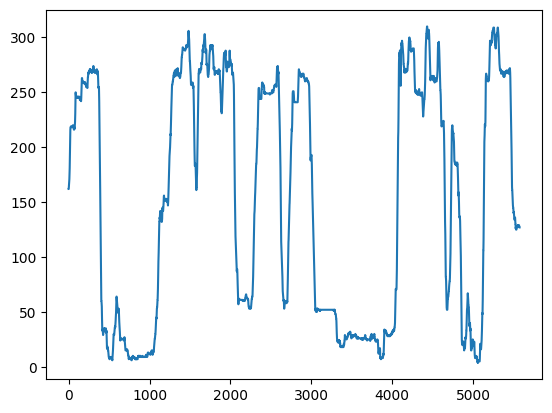

In [26]:
plt.plot(zs, label='measured')

In [27]:
kfx = np.zeros(len(zs))
kfv = np.zeros(len(zs))
for i, z in enumerate(zs):
    kf.predict()
    kf.update(z)
    kfx[i] = kf.x[0, 0]
    kfv[i] = kf.x[1, 0]

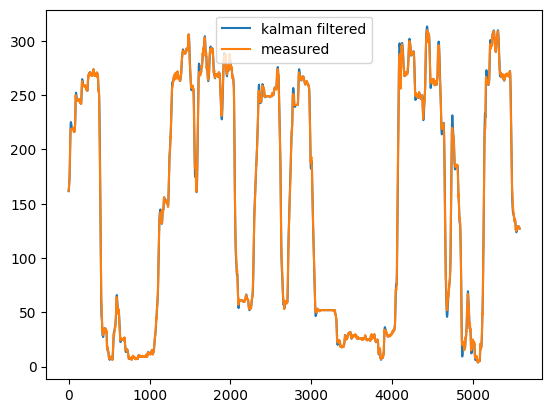

In [28]:
plt.plot(kfx, label='kalman filtered')
plt.plot(zs, label='measured')
plt.legend()

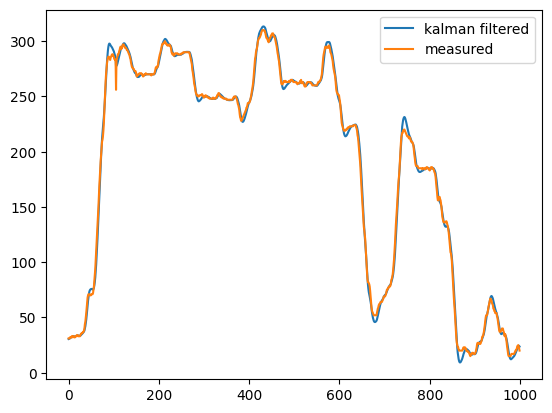

In [29]:
loc, pad = 4500, 500

plt.plot(kfx[loc - pad: loc + pad], label='kalman filtered')
plt.plot(zs[loc - pad: loc + pad], label='measured')
plt.legend()